# 十分钟入门 pandas




**10 Minutes to pandas**

**官方原文地址：**[在这里](https://pandas.pydata.org/pandas-docs/version/0.22.0/10min.html)

运行环境：Jupyter Notebook, Python 3.7

主要是翻译了官方的教程，下面都是自己在 Jupyter Notebook 里跑的，顺便记了点笔记吧。

> 首发于 MiaoTony's 小窝，**Blog 文章地址：**[数据科学 | 十分钟入门pandas/常用方法笔记](https://miaotony.xyz/2020/04/17/DataScience_10MinutesToPandas/)
>
>欢迎来我的博客转转呢~

## 0x01 导入模块

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

这些都是常用别名了呢（

## 0x02 创建对象 Object Creation

传递一个list对象来创建一个Series，pandas会默认创建整型索引(index)。

In [3]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

传递一个numpy array，时间索引以及列标签来创建一个DataFrame

In [6]:
dates = pd.date_range('20200416', periods=6)
dates

DatetimeIndex(['2020-04-16', '2020-04-17', '2020-04-18', '2020-04-19',
               '2020-04-20', '2020-04-21'],
              dtype='datetime64[ns]', freq='D')

In [8]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2020-04-16,-0.228084,0.712521,0.743378,0.526823
2020-04-17,-0.423923,0.564346,-2.318931,0.080931
2020-04-18,-2.032243,2.046827,1.176614,-0.365556
2020-04-19,-1.200005,1.109991,-1.527804,1.068642
2020-04-20,-0.535031,1.351420,0.907865,-1.074013
2020-04-21,-0.614734,0.027143,-0.420875,-0.333819


传递一个能够被转换成类似序列结构的字典对象来创建一个DataFrame

In [23]:
df2 = pd.DataFrame({ 'A' : 1.,
 'B' : pd.Timestamp('20200416183800'),
 'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
 'D' : np.array([3] * 4,dtype='int32'),
 'E' : pd.Categorical(["test","train","test","train"]),
 'F' : 'foo' })
df2

,A,B,C,D,E,F
0,1.0,2020-04-16 18:38:00,1.0,3,test,foo
1,1.0,2020-04-16 18:38:00,1.0,3,train,foo
2,1.0,2020-04-16 18:38:00,1.0,3,test,foo
3,1.0,2020-04-16 18:38:00,1.0,3,train,foo


查看他们的数据类型(dtypes).

In [24]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [32]:
dir(df2)

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_SLICEMAP',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__

## 0x03 查看数据 Viewing Data

查看 frame 中头部和尾部的行

In [40]:
df.head()

,A,B,C,D
2020-04-16,-0.228084,0.712521,0.743378,0.526823
2020-04-17,-0.423923,0.564346,-2.318931,0.080931
2020-04-18,-2.032243,2.046827,1.176614,-0.365556
2020-04-19,-1.200005,1.109991,-1.527804,1.068642
2020-04-20,-0.535031,1.351420,0.907865,-1.074013


In [41]:
df.head(2)  # 前两行

,A,B,C,D
2020-04-16,-0.228084,0.712521,0.743378,0.526823
2020-04-17,-0.423923,0.564346,-2.318931,0.080931


In [38]:
df.tail(3)  # 倒数三行

,A,B,C,D
2020-04-19,-1.200005,1.109991,-1.527804,1.068642
2020-04-20,-0.535031,1.351420,0.907865,-1.074013
2020-04-21,-0.614734,0.027143,-0.420875,-0.333819


显示索引、列和底层的(underlying) numpy 数据

In [47]:
df

,A,B,C,D
2020-04-16,-0.228084,0.712521,0.743378,0.526823
2020-04-17,-0.423923,0.564346,-2.318931,0.080931
2020-04-18,-2.032243,2.046827,1.176614,-0.365556
2020-04-19,-1.200005,1.109991,-1.527804,1.068642
2020-04-20,-0.535031,1.351420,0.907865,-1.074013
2020-04-21,-0.614734,0.027143,-0.420875,-0.333819


In [43]:
df.index

DatetimeIndex(['2020-04-16', '2020-04-17', '2020-04-18', '2020-04-19',
               '2020-04-20', '2020-04-21'],
              dtype='datetime64[ns]', freq='D')

In [44]:
df2.index

Int64Index([0, 1, 2, 3], dtype='int64')

In [45]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [46]:
df.values

array([[-0.22808386,  0.71252123,  0.74337822,  0.52682341],
       [-0.42392275,  0.56434629, -2.31893066,  0.08093058],
       [-2.03224294,  2.04682736,  1.17661398, -0.3655562 ],
       [-1.20000469,  1.10999124, -1.52780407,  1.06864157],
       [-0.53503099,  1.35142044,  0.90786509, -1.07401348],
       [-0.61473412,  0.02714293, -0.42087502, -0.33381946]])

In [48]:
df2.values

array([[1.0, Timestamp('2020-04-16 18:38:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2020-04-16 18:38:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2020-04-16 18:38:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2020-04-16 18:38:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [54]:
print(type(df))
print(type(df.columns))
print(type(df.values))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.indexes.base.Index'>
<class 'numpy.ndarray'>


`describe` 函数对于数据的快速统计汇总

In [55]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.839003,0.968708,-0.239959,-0.016166
std,0.669679,0.699208,1.435586,0.751411
min,-2.032243,0.027143,-2.318931,-1.074013
25%,-1.053687,0.601390,-1.251072,-0.357622
50%,-0.574883,0.911256,0.161252,-0.126444
75%,-0.451700,1.291063,0.866743,0.415350
max,-0.228084,2.046827,1.176614,1.068642


In [57]:
df2.describe()

,A,C,D
count,4.0,4.0,4.0
mean,1.0,1.0,3.0
std,0.0,0.0,0.0
min,1.0,1.0,3.0
25%,1.0,1.0,3.0
50%,1.0,1.0,3.0
75%,1.0,1.0,3.0
max,1.0,1.0,3.0


对数据进行转置(Transposing)

In [58]:
df.T

,2020-04-16 00:00:00,2020-04-17 00:00:00,2020-04-18 00:00:00,2020-04-19 00:00:00,2020-04-20 00:00:00,2020-04-21 00:00:00
A,-0.228084,-0.423923,-2.032243,-1.200005,-0.535031,-0.614734
B,0.712521,0.564346,2.046827,1.109991,1.351420,0.027143
C,0.743378,-2.318931,1.176614,-1.527804,0.907865,-0.420875
D,0.526823,0.080931,-0.365556,1.068642,-1.074013,-0.333819


In [62]:
df2.T

,0,1,2,3
A,1,1,1,1
B,2020-04-16 18:38:00,2020-04-16 18:38:00,2020-04-16 18:38:00,2020-04-16 18:38:00
C,1,1,1,1
D,3,3,3,3
E,test,train,test,train
F,foo,foo,foo,foo


按照某一坐标轴进行排序

In [63]:
df.sort_index(axis=1, ascending=False)  # 降序

,D,C,B,A
2020-04-16,0.526823,0.743378,0.712521,-0.228084
2020-04-17,0.080931,-2.318931,0.564346,-0.423923
2020-04-18,-0.365556,1.176614,2.046827,-2.032243
2020-04-19,1.068642,-1.527804,1.109991,-1.200005
2020-04-20,-1.074013,0.907865,1.351420,-0.535031
2020-04-21,-0.333819,-0.420875,0.027143,-0.614734


In [68]:
df.sort_index(axis=1, ascending=True)  # 升序（默认）

,A,B,C,D
2020-04-16,-0.228084,0.712521,0.743378,0.526823
2020-04-17,-0.423923,0.564346,-2.318931,0.080931
2020-04-18,-2.032243,2.046827,1.176614,-0.365556
2020-04-19,-1.200005,1.109991,-1.527804,1.068642
2020-04-20,-0.535031,1.351420,0.907865,-1.074013
2020-04-21,-0.614734,0.027143,-0.420875,-0.333819


In [70]:
df.sort_index(axis=0, ascending=False)  # 以第0轴（行）来排序，降序

,A,B,C,D
2020-04-21,-0.614734,0.027143,-0.420875,-0.333819
2020-04-20,-0.535031,1.351420,0.907865,-1.074013
2020-04-19,-1.200005,1.109991,-1.527804,1.068642
2020-04-18,-2.032243,2.046827,1.176614,-0.365556
2020-04-17,-0.423923,0.564346,-2.318931,0.080931
2020-04-16,-0.228084,0.712521,0.743378,0.526823


按值进行排序，默认为升序

In [73]:
df.sort_values(by='B')

,A,B,C,D
2020-04-21,-0.614734,0.027143,-0.420875,-0.333819
2020-04-17,-0.423923,0.564346,-2.318931,0.080931
2020-04-16,-0.228084,0.712521,0.743378,0.526823
2020-04-19,-1.200005,1.109991,-1.527804,1.068642
2020-04-20,-0.535031,1.351420,0.907865,-1.074013
2020-04-18,-2.032243,2.046827,1.176614,-0.365556


## 0x04 选择数据 Selection
> **注意：** 虽然标准的 Python/Numpy 的选择和设置表达式都非常易懂且方便用于交互使用，但是作为工程使用的代码，推荐使用经过优化的 pandas 数据访问方法： `.at`, `.iat`, `.loc`, `.iloc` 和 `.ix`。

### 0x04-1 获取 Getting
选择一个单独的列，这将会返回一个 `Series`，等效于 `df.A`

In [75]:
df['A']

2020-04-16   -0.228084
2020-04-17   -0.423923
2020-04-18   -2.032243
2020-04-19   -1.200005
2020-04-20   -0.535031
2020-04-21   -0.614734
Freq: D, Name: A, dtype: float64

 通过`[]`进行选择，可以用来行进行切片(slice)

In [77]:
df[1:3]

,A,B,C,D
2020-04-17,-0.423923,0.564346,-2.318931,0.080931
2020-04-18,-2.032243,2.046827,1.176614,-0.365556


In [81]:
df['20200418':'20200420']

,A,B,C,D
2020-04-18,-2.032243,2.046827,1.176614,-0.365556
2020-04-19,-1.200005,1.109991,-1.527804,1.068642
2020-04-20,-0.535031,1.351420,0.907865,-1.074013


### 0x4-2 通过标签选择 Selection by Label
**利用 pandas 的 `.loc`, `.at` 方法**

使用标签来获取一个交叉的区域

In [85]:
dates[0]

Timestamp('2020-04-16 00:00:00', freq='D')

In [82]:
df.loc[dates[0]]

A   -0.228084
B    0.712521
C    0.743378
D    0.526823
Name: 2020-04-16 00:00:00, dtype: float64

用标签来在多个轴上进行选择

In [86]:
df.loc[:,['A','B']]

,A,B
2020-04-16,-0.228084,0.712521
2020-04-17,-0.423923,0.564346
2020-04-18,-2.032243,2.046827
2020-04-19,-1.200005,1.109991
2020-04-20,-0.535031,1.351420
2020-04-21,-0.614734,0.027143


利用标签来切片

注意此处的切片**两端都包含（左闭右闭）**

In [103]:
df.loc['20200418':'20200420',['A','B']]

,A,B
2020-04-18,-2.032243,2.046827
2020-04-19,-1.200005,1.109991
2020-04-20,-0.535031,1.351420


In [100]:
df.loc[dates[2]:,:'C']

,A,B,C
2020-04-18,-2.032243,2.046827,1.176614
2020-04-19,-1.200005,1.109991,-1.527804
2020-04-20,-0.535031,1.351420,0.907865
2020-04-21,-0.614734,0.027143,-0.420875


对于返回的对象进行维度缩减

In [106]:
df.loc['20200419',['A','B']]

A   -1.200005
B    1.109991
Name: 2020-04-19 00:00:00, dtype: float64

获取一个标量

In [107]:
df.loc[dates[2],'A']

-2.0322429408627056

快速访问一个标量（与上一个方法等价）

In [110]:
df.at[dates[2],'A']

-2.0322429408627056

### 0x04-3 通过位置进行选择 Selection by Position
**利用的是 pandas 里的 `.iloc`, `.iat` 方法**

通过传递整数值进行位置选择

In [111]:
df.iloc[3] 

A   -1.200005
B    1.109991
C   -1.527804
D    1.068642
Name: 2020-04-19 00:00:00, dtype: float64

In [116]:
df.iloc[:,2]  # [行，列] 或 [第0维，第1维]

2020-04-16    0.743378
2020-04-17   -2.318931
2020-04-18    1.176614
2020-04-19   -1.527804
2020-04-20    0.907865
2020-04-21   -0.420875
Freq: D, Name: C, dtype: float64

利用数值进行切片，类似于 numpy/python

**注意一下，这里的切片是普通的切片，即左闭右开。**

In [117]:
df.iloc[3:5,0:2]

,A,B
2020-04-19,-1.200005,1.109991
2020-04-20,-0.535031,1.351420


可以指定一个位置的列表来选择数据区域

In [118]:
df.iloc[[1,2,4],[0,2]]

,A,C
2020-04-17,-0.423923,-2.318931
2020-04-18,-2.032243,1.176614
2020-04-20,-0.535031,0.907865


对行进行切片

In [119]:
df.iloc[1:3,:]

,A,B,C,D
2020-04-17,-0.423923,0.564346,-2.318931,0.080931
2020-04-18,-2.032243,2.046827,1.176614,-0.365556


对列进行切片

In [123]:
df.iloc[:,1:3]

,B,C
2020-04-16,0.712521,0.743378
2020-04-17,0.564346,-2.318931
2020-04-18,2.046827,1.176614
2020-04-19,1.109991,-1.527804
2020-04-20,1.351420,0.907865
2020-04-21,0.027143,-0.420875


利用位置快速得到一个位置对应的值

In [124]:
df.iloc[1,1]

0.5643462917985026

In [125]:
df.iat[1,1]

0.5643462917985026

### .ix 用法（Deprecated）

`df.ix[]` 既可以通过整数索引进行数据选取，也可以通过标签索引进行数据选取。

也就是说，`df.ix[]` 是 `df.loc[]` 和 `df.iloc[]` 的功能集合，且在同义词选取中，可以同时使用整数索引和标签索引。

这个方法在官方的 *10 Minutes to pandas* 中没有专门说明，**不建议用这一方法，请用`.loc`和`.iloc`来索引**，那这里就提一下好了。

In [305]:
df.ix[1,'A']

D:\Programs\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


-1.363418018143355

In [311]:
df.ix[dates[1:3],[0,2,3]]

D:\Programs\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,A,C,D
2020-04-17,-11.332834,7.659436,-20.925183
2020-04-18,-11.040688,6.867701,-20.157355


从 DeprecationWarning 看来的确已经 **deprecated** 了，那就不要用了！

### 0x04-4 布尔索引 Boolean Indexing

使用一个单独列的值来选择数据

In [127]:
df[df.D > 0]

,A,B,C,D
2020-04-16,-0.228084,0.712521,0.743378,0.526823
2020-04-17,-0.423923,0.564346,-2.318931,0.080931
2020-04-19,-1.200005,1.109991,-1.527804,1.068642


利用**布尔条件**从一个 DataFrame 中选择数据

In [129]:
df>0

,A,B,C,D
2020-04-16,False,True,True,True
2020-04-17,False,True,False,True
2020-04-18,False,True,True,False
2020-04-19,False,True,False,True
2020-04-20,False,True,True,False
2020-04-21,False,True,False,False


In [130]:
df[df > 0]

,A,B,C,D
2020-04-16,NaN,0.712521,0.743378,0.526823
2020-04-17,NaN,0.564346,NaN,0.080931
2020-04-18,NaN,2.046827,1.176614,NaN
2020-04-19,NaN,1.109991,NaN,1.068642
2020-04-20,NaN,1.351420,0.907865,NaN
2020-04-21,NaN,0.027143,NaN,NaN


使用 `isin()` 方法来过滤数据

(is in)

In [131]:
df3 = df.copy()
df3['E'] = ['one', 'one','two','three','four','three']
df3

,A,B,C,D,E
2020-04-16,-0.228084,0.712521,0.743378,0.526823,one
2020-04-17,-0.423923,0.564346,-2.318931,0.080931,one
2020-04-18,-2.032243,2.046827,1.176614,-0.365556,two
2020-04-19,-1.200005,1.109991,-1.527804,1.068642,three
2020-04-20,-0.535031,1.351420,0.907865,-1.074013,four
2020-04-21,-0.614734,0.027143,-0.420875,-0.333819,three


In [133]:
df3[df3['E'].isin(['two','four'])]

,A,B,C,D,E
2020-04-18,-2.032243,2.046827,1.176614,-0.365556,two
2020-04-20,-0.535031,1.351420,0.907865,-1.074013,four


## 0x05 设置数据 Setting

设置一个新的列，自动按照索引来对其数据

In [135]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20200416', periods=6))
s1

2020-04-16    1
2020-04-17    2
2020-04-18    3
2020-04-19    4
2020-04-20    5
2020-04-21    6
Freq: D, dtype: int64

In [137]:
df['F'] = s1

通过标签设置新的值

In [145]:
df.at[dates[0],'A'] = 0

通过标签设置新的值

In [146]:
df.iat[0,1] = 0

通过一个 numpy 数组设置一组新值

In [148]:
df.loc[:,'D'] = np.array([5] * len(df))

上述操作结果如下

In [149]:
df

,A,B,C,D,F
2020-04-16,0.000000,0.000000,0.743378,5,1
2020-04-17,-0.423923,0.564346,-2.318931,5,2
2020-04-18,-2.032243,2.046827,1.176614,5,3
2020-04-19,-1.200005,1.109991,-1.527804,5,4
2020-04-20,-0.535031,1.351420,0.907865,5,5
2020-04-21,-0.614734,0.027143,-0.420875,5,6


通过 where 操作来设置新的值

In [151]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2020-04-16,0.000000,0.000000,-0.743378,-5,-1
2020-04-17,-0.423923,-0.564346,-2.318931,-5,-2
2020-04-18,-2.032243,-2.046827,-1.176614,-5,-3
2020-04-19,-1.200005,-1.109991,-1.527804,-5,-4
2020-04-20,-0.535031,-1.351420,-0.907865,-5,-5
2020-04-21,-0.614734,-0.027143,-0.420875,-5,-6


## 0x06 缺失值处理 Missing Data

在pandas中，使用`np.nan`来代替缺失值，这些值将默认不会包含在计算中。


`reindex()`方法可以对指定轴上的索引进行改变/增加/删除操作，返回原始数据的一个拷贝。

In [153]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1

,A,B,C,D,F,E
2020-04-16,0.000000,0.000000,0.743378,5,1,NaN
2020-04-17,-0.423923,0.564346,-2.318931,5,2,NaN
2020-04-18,-2.032243,2.046827,1.176614,5,3,NaN
2020-04-19,-1.200005,1.109991,-1.527804,5,4,NaN


In [154]:
df1.loc[dates[0]:dates[1],'E'] = 1
df1

,A,B,C,D,F,E
2020-04-16,0.000000,0.000000,0.743378,5,1,1.0
2020-04-17,-0.423923,0.564346,-2.318931,5,2,1.0
2020-04-18,-2.032243,2.046827,1.176614,5,3,NaN
2020-04-19,-1.200005,1.109991,-1.527804,5,4,NaN


去掉包含缺失值的行

In [155]:
df1.dropna(how='any')

,A,B,C,D,F,E
2020-04-16,0.000000,0.000000,0.743378,5,1,1.0
2020-04-17,-0.423923,0.564346,-2.318931,5,2,1.0


填充缺失的值，利用`value`来指定

In [158]:
print(df1)
df1.fillna(value=5)

                   A         B         C  D  F    E
2020-04-16  0.000000  0.000000  0.743378  5  1  1.0
2020-04-17 -0.423923  0.564346 -2.318931  5  2  1.0
2020-04-18 -2.032243  2.046827  1.176614  5  3  NaN
2020-04-19 -1.200005  1.109991 -1.527804  5  4  NaN


,A,B,C,D,F,E
2020-04-16,0.000000,0.000000,0.743378,5,1,1.0
2020-04-17,-0.423923,0.564346,-2.318931,5,2,1.0
2020-04-18,-2.032243,2.046827,1.176614,5,3,5.0
2020-04-19,-1.200005,1.109991,-1.527804,5,4,5.0


获取值为`nan`的布尔值(boolean mask)

In [159]:
pd.isna(df1)

,A,B,C,D,F,E
2020-04-16,False,False,False,False,False,False
2020-04-17,False,False,False,False,False,False
2020-04-18,False,False,False,False,False,True
2020-04-19,False,False,False,False,False,True


## 0x07 一些常用的操作 Operations


### 0x07-1 统计 Stats
这些操作**不包括缺失数据**

执行描述性统计：

In [160]:
df.mean()  # 均值，默认为列的

A   -0.800989
B    0.849955
C   -0.239959
D    5.000000
F    3.500000
dtype: float64

In [163]:
df.mean(1)  # 指定坐标轴（此处为行）

2020-04-16    1.348676
2020-04-17    0.964299
2020-04-18    1.838240
2020-04-19    1.476436
2020-04-20    2.344851
2020-04-21    1.998307
Freq: D, dtype: float64

对于拥有不同维度，需要对齐对象再进行操作。

Pandas 会自动的沿着指定的维度进行广播。

In [173]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)
s

2020-04-16    NaN
2020-04-17    NaN
2020-04-18    1.0
2020-04-19    3.0
2020-04-20    5.0
2020-04-21    NaN
Freq: D, dtype: float64

In [174]:
print(df)
df.sub(s, axis='index')  # df-s

                   A         B         C  D  F
2020-04-16  0.000000  0.000000  0.743378  5  1
2020-04-17 -0.423923  0.564346 -2.318931  5  2
2020-04-18 -2.032243  2.046827  1.176614  5  3
2020-04-19 -1.200005  1.109991 -1.527804  5  4
2020-04-20 -0.535031  1.351420  0.907865  5  5
2020-04-21 -0.614734  0.027143 -0.420875  5  6


,A,B,C,D,F
2020-04-16,NaN,NaN,NaN,NaN,NaN
2020-04-17,NaN,NaN,NaN,NaN,NaN
2020-04-18,-3.032243,1.046827,0.176614,4.0,2.0
2020-04-19,-4.200005,-1.890009,-4.527804,2.0,1.0
2020-04-20,-5.535031,-3.648580,-4.092135,0.0,0.0
2020-04-21,NaN,NaN,NaN,NaN,NaN


### 0x07-2 应用方法到数据 Apply
Applying functions to the data

In [175]:
df.apply(np.cumsum)  # cumsum 默认按照行累加

,A,B,C,D,F
2020-04-16,0.000000,0.000000,0.743378,5,1
2020-04-17,-0.423923,0.564346,-1.575552,10,3
2020-04-18,-2.456166,2.611174,-0.398938,15,6
2020-04-19,-3.656170,3.721165,-1.926743,20,10
2020-04-20,-4.191201,5.072585,-1.018877,25,15
2020-04-21,-4.805935,5.099728,-1.439752,30,21


In [178]:
df.apply(np.cumsum,axis=1)  # 指定 cumsum 的 axis 参数，按照列累加

,A,B,C,D,F
2020-04-16,0.000000,0.000000,0.743378,5.743378,6.743378
2020-04-17,-0.423923,0.140424,-2.178507,2.821493,4.821493
2020-04-18,-2.032243,0.014584,1.191198,6.191198,9.191198
2020-04-19,-1.200005,-0.090013,-1.617818,3.382182,7.382182
2020-04-20,-0.535031,0.816389,1.724255,6.724255,11.724255
2020-04-21,-0.614734,-0.587591,-1.008466,3.991534,9.991534


In [176]:
df.apply(lambda x: x.max() - x.min())

A    2.032243
B    2.046827
C    3.495545
D    0.000000
F    5.000000
dtype: float64

### 0x07-3 直方图 Histogramming

In [179]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    0
1    4
2    5
3    0
4    3
5    2
6    2
7    0
8    5
9    1
dtype: int32

In [180]:
s.value_counts()

0    3
5    2
2    2
4    1
3    1
1    1
dtype: int64

### 0x07-4 字符串方法 String Methods

Series 在`str`属性中准备了一组字符串处理方法，可以方便地对数组的每个元素进行操作，如下面的代码片段所示。

注意`str`中的模式匹配通常默认使用'**正则表达式**（在某些情况下总是使用它们）。

In [181]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## 0x08 合并 Merge

pandas 提供了一系列的方法，在 join/merge 操作中，可以轻松地对`Series`, `DataFrame`和`Panel`对象进行各种集合逻辑以及关系代数的操作。

### 0x08-1 Concat

In [182]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-0.089143,0.087569,0.218078,-0.336815
1,-0.694835,0.108324,-1.882762,-0.220210
2,-2.069784,-0.788424,-1.694595,0.569263
3,2.433036,0.719851,-0.109935,0.177864
4,-0.838252,1.117676,0.880839,-1.118529
5,1.706060,0.290877,-0.907941,-0.532450
6,0.118169,-0.496975,-0.190422,0.783875
7,-1.213645,-0.489622,-0.798443,-0.471611
8,-0.314598,-2.658906,-1.139778,0.374437
9,0.229281,-1.372309,0.996916,-1.013462


In [184]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0 -0.089143  0.087569  0.218078 -0.336815
 1 -0.694835  0.108324 -1.882762 -0.220210
 2 -2.069784 -0.788424 -1.694595  0.569263,
           0         1         2         3
 3  2.433036  0.719851 -0.109935  0.177864
 4 -0.838252  1.117676  0.880839 -1.118529
 5  1.706060  0.290877 -0.907941 -0.532450
 6  0.118169 -0.496975 -0.190422  0.783875,
           0         1         2         3
 7 -1.213645 -0.489622 -0.798443 -0.471611
 8 -0.314598 -2.658906 -1.139778  0.374437
 9  0.229281 -1.372309  0.996916 -1.013462]

In [185]:
pd.concat(pieces)

,0,1,2,3
0,-0.089143,0.087569,0.218078,-0.336815
1,-0.694835,0.108324,-1.882762,-0.220210
2,-2.069784,-0.788424,-1.694595,0.569263
3,2.433036,0.719851,-0.109935,0.177864
4,-0.838252,1.117676,0.880839,-1.118529
5,1.706060,0.290877,-0.907941,-0.532450
6,0.118169,-0.496975,-0.190422,0.783875
7,-1.213645,-0.489622,-0.798443,-0.471611
8,-0.314598,-2.658906,-1.139778,0.374437
9,0.229281,-1.372309,0.996916,-1.013462


### 0x08-2 Join

类似于 SQL 类型的合并。

下面是 key 相同的情况。

In [187]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
left

,key,lval
0,foo,1
1,foo,2


In [188]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
right

,key,rval
0,foo,4
1,foo,5


In [189]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


另一个例子，key 不同的情况。

In [190]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
left

,key,lval
0,foo,1
1,bar,2


In [191]:
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
right

,key,rval
0,foo,4
1,bar,5


In [192]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


### 0x08-3 Append
将一行加入到一个 DataFrame 上

In [193]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])
df

,A,B,C,D
0,-2.727829,-1.382168,0.961920,0.083472
1,-0.297131,-0.294723,0.303267,-0.539177
2,-0.226735,-2.157170,1.559418,0.102023
3,0.569927,-0.800855,0.918515,1.630873
4,0.402999,-2.238052,2.181635,1.950669
5,1.238971,-0.165159,0.688200,0.793499
6,1.356265,-0.034859,-0.020774,0.485487
7,-1.793398,0.900625,0.365789,-2.089145


In [195]:
s = df.iloc[3]
df.append(s, ignore_index=True)  # 忽略 index

,A,B,C,D
0,-2.727829,-1.382168,0.961920,0.083472
1,-0.297131,-0.294723,0.303267,-0.539177
2,-0.226735,-2.157170,1.559418,0.102023
3,0.569927,-0.800855,0.918515,1.630873
4,0.402999,-2.238052,2.181635,1.950669
5,1.238971,-0.165159,0.688200,0.793499
6,1.356265,-0.034859,-0.020774,0.485487
7,-1.793398,0.900625,0.365789,-2.089145
8,0.569927,-0.800855,0.918515,1.630873


In [197]:
s = df.iloc[4]
df.append(s, ignore_index=False)

,A,B,C,D
0,-2.727829,-1.382168,0.961920,0.083472
1,-0.297131,-0.294723,0.303267,-0.539177
2,-0.226735,-2.157170,1.559418,0.102023
3,0.569927,-0.800855,0.918515,1.630873
4,0.402999,-2.238052,2.181635,1.950669
5,1.238971,-0.165159,0.688200,0.793499
6,1.356265,-0.034859,-0.020774,0.485487
7,-1.793398,0.900625,0.365789,-2.089145
4,0.402999,-2.238052,2.181635,1.950669


## 0x09 分组 Grouping

对于分组(group by)，通常有下面几个操作步骤：
- Splitting 按照一些规则将数据分为不同的组

- Applying 对于每组数据分别执行一个函数

- Combining 将结果组合到一个数据结构中

In [199]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                         'foo', 'bar', 'foo', 'foo'],
                  'B' : ['one', 'one', 'two', 'three',
                         'two', 'two', 'one', 'three'],
                  'C' : np.random.randn(8),
                  'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,1.038586,2.040014
1,bar,one,0.454452,-0.553457
2,foo,two,-0.730273,-0.207136
3,bar,three,0.435136,0.443462
4,foo,two,2.557988,-1.831259
5,bar,two,1.131084,0.915332
6,foo,one,1.078171,0.037355
7,foo,three,2.057203,1.209778


分组并对得到的分组执行`sum`函数。

In [202]:
df.groupby('A').sum()

,C,D
A,,
bar,-1.001520,1.880284
foo,1.365107,1.459170


通过多个列进行分组形成一个层次(hierarchical)索引，然后执行函数。

In [205]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    0.598883  1.667737
    three -0.605689 -0.531403
    two   -0.994715  0.743951
foo one   -0.090250  0.694644
    three  0.738067  1.498865
    two    0.717290 -0.734339

## 0x0A 重塑/改变形状 Reshaping

### 0x0A-1 Stack

In [207]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                      'foo', 'foo', 'qux', 'qux'],
                     ['one', 'two', 'one', 'two',
                      'one', 'two', 'one', 'two']]))
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [208]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df

A         B
first second                    
bar   one     1.402402 -0.215913
      two    -0.305333 -0.679614
baz   one     0.745205  0.872718
      two     0.421718 -0.662528
foo   one    -1.433628  0.627898
      two     2.129267 -0.260206
qux   one     0.498752 -0.622814
      two    -0.356492  1.364184

In [209]:
df2 = df[:4]
df2

A         B
first second                    
bar   one     1.402402 -0.215913
      two    -0.305333 -0.679614
baz   one     0.745205  0.872718
      two     0.421718 -0.662528

`stack()`方法在 DataFrame 列的层次上进行**压缩** 

In [210]:
stacked = df2.stack()
stacked

first  second   
bar    one     A    1.402402
               B   -0.215913
       two     A   -0.305333
               B   -0.679614
baz    one     A    0.745205
               B    0.872718
       two     A    0.421718
               B   -0.662528
dtype: float64

对于一个经过了 stack 的 DataFrame 或者 Series（以 MultiIndex 作为索引），`stack()`的逆运算是`isunstack()`，默认情况下是 unstack 最后一层。 

就是说，bar、baz是第0级，one、two是第1级，A、B是第2级。

In [211]:
stacked.unstack()

A         B
first second                    
bar   one     1.402402 -0.215913
      two    -0.305333 -0.679614
baz   one     0.745205  0.872718
      two     0.421718 -0.662528

In [212]:
stacked.unstack(1)

second        one       two
first                      
bar   A  1.402402 -0.305333
      B -0.215913 -0.679614
baz   A  0.745205  0.421718
      B  0.872718 -0.662528

In [213]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  1.402402  0.745205
       B -0.215913  0.872718
two    A -0.305333  0.421718
       B -0.679614 -0.662528

### 0x0A-2 数据透视表 Pivot Tables

In [221]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['A', 'B', 'C'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D' : np.random.randn(12),
                   'E' : np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,0.072696,0.305015
1,one,B,foo,1.428383,-1.108178
2,two,C,foo,1.239483,0.001580
3,three,A,bar,-0.953547,1.061740
4,one,B,bar,0.762730,1.161542
5,one,C,bar,-0.372740,-0.480251
6,two,A,foo,0.765181,-1.034218
7,three,B,foo,-1.858334,0.359220
8,one,C,foo,-0.952807,1.067494
9,one,A,bar,0.541013,-0.280833


In [222]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  0.541013  0.072696
      B  0.762730  1.428383
      C -0.372740 -0.952807
three A -0.953547       NaN
      B       NaN -1.858334
      C -1.049108       NaN
two   A       NaN  0.765181
      B -1.810560       NaN
      C       NaN  1.239483

## 0x0B 时间序列  Time Series

Pandas 在对频率转换进行重新采样时拥有简单、强大且高效的功能（如将按秒采样的数据转换为按5分钟为单位进行采样的数据）。这种操作在金融领域非常常见，但不局限于此。

*哇，原来还可以这样玩唉（*

这个在信号处理里面也很常用的呢！

In [235]:
rng = pd.date_range('1/1/2020', periods=200, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample('1Min').sum()

2020-01-01 00:00:00    13244
2020-01-01 00:01:00    14799
2020-01-01 00:02:00    15489
2020-01-01 00:03:00     3894
Freq: T, dtype: int32

### 时区表示

In [238]:
rng = pd.date_range('4/16/2020 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2020-04-16    0.872043
2020-04-17   -0.305200
2020-04-18    1.681828
2020-04-19    0.163184
2020-04-20    1.415422
Freq: D, dtype: float64

In [240]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2020-04-16 00:00:00+00:00    0.872043
2020-04-17 00:00:00+00:00   -0.305200
2020-04-18 00:00:00+00:00    1.681828
2020-04-19 00:00:00+00:00    0.163184
2020-04-20 00:00:00+00:00    1.415422
Freq: D, dtype: float64

### 转换到另外一个时区

In [242]:
ts_utc.tz_convert('Asia/Shanghai')

2020-04-16 08:00:00+08:00    0.872043
2020-04-17 08:00:00+08:00   -0.305200
2020-04-18 08:00:00+08:00    1.681828
2020-04-19 08:00:00+08:00    0.163184
2020-04-20 08:00:00+08:00    1.415422
Freq: D, dtype: float64

### 时间跨度转换

In [251]:
rng = pd.date_range('1/1/2020', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2020-01-31    0.259847
2020-02-29   -0.092969
2020-03-31    0.525985
2020-04-30    0.090362
2020-05-31    1.707569
Freq: M, dtype: float64

In [252]:
ps = ts.to_period()
ps

2020-01    0.259847
2020-02   -0.092969
2020-03    0.525985
2020-04    0.090362
2020-05    1.707569
Freq: M, dtype: float64

In [253]:
ps.to_timestamp()

2020-01-01    0.259847
2020-02-01   -0.092969
2020-03-01    0.525985
2020-04-01    0.090362
2020-05-01    1.707569
Freq: MS, dtype: float64

时期和时间戳之间的转换使得可以使用一些方便的算术函数。

下面这个例子，转换一个每年以11月结束的季度频率为 季度结束后的月末的上午9点。*（有点懵*

In [256]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts.head()

1990-03-01 09:00   -1.287411
1990-06-01 09:00    1.744485
1990-09-01 09:00    0.336561
1990-12-01 09:00   -1.206576
1991-03-01 09:00    0.108631
Freq: H, dtype: float64

## 0x0C 类别 Categoricals

pandas 可以在 DataFrame 中支持 category 类型的数据。

In [257]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

将 raw grades 转换为 category 数据类型。

In [259]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

将 category 类型数据重命名为更有意义的名称，利用`Series.cat.categories`方法。

In [261]:
df["grade"].cat.categories = ["very good", "good", "very bad"]
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): [very good, good, very bad]

对类别进行重新排序，同时增加缺失的类别。

`Series.cat`下的方法默认返回一个新的序列。

In [263]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

 排序是按照 category 的顺序进行的，而不是按照词汇顺序(lexical order)。

In [264]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


对一个 Category 类型的列进行分组时显示了空的类别。

In [267]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## 0x0D 作图 Plotting 

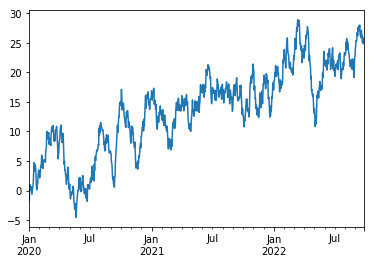

In [284]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2020', periods=1000))
ts = ts.cumsum()
ts.plot()

对于 DataFrame 而言，`plot()`方法是一种将所有带有标签的列进行绘制的简便方法。

<Figure size 432x288 with 0 Axes>

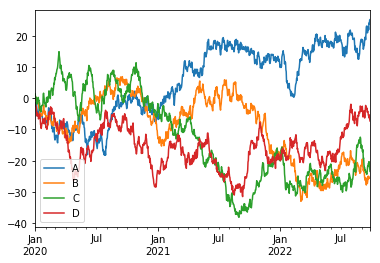

In [295]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])
# print(df)
df = df.cumsum()
plt.figure()
df.plot()
plt.legend(loc='best')

In [296]:
ts.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2022-09-17', '2022-09-18', '2022-09-19', '2022-09-20',
               '2022-09-21', '2022-09-22', '2022-09-23', '2022-09-24',
               '2022-09-25', '2022-09-26'],
              dtype='datetime64[ns]', length=1000, freq='D')

## 0x0E 导入导出数据 Getting Data In/Out 

### 0x0E-1 CSV

**写入 csv 文件**

In [297]:
df.to_csv('foo.csv')  # 保存在当前目录下

**从 csv 文件中导入数据**

In [298]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2020-01-01,-1.397481,-0.453722,1.374079,-2.095767
1,2020-01-02,-1.363418,0.529293,0.178497,-2.364989
2,2020-01-03,-2.047267,-0.333020,0.379978,-2.628204
3,2020-01-04,-2.305870,-0.145598,-0.232491,-2.812290
4,2020-01-05,-1.851390,-1.378215,-1.202399,-4.574516
5,2020-01-06,-3.438928,-0.779975,-1.864979,-5.666847
6,2020-01-07,-4.201270,-0.827366,-0.796513,-5.267628
7,2020-01-08,-5.682762,-1.009404,-0.760801,-4.696243
8,2020-01-09,-4.362126,-0.768552,-0.747517,-5.562345
9,2020-01-10,-5.226357,-1.791920,0.290504,-5.214061


### 0x0E-2 HDF5

**写入 HDF5 存储**

In [299]:
df.to_hdf('foo.h5','df')

**从 HDF5 存储中读取数据**

In [300]:
pd.read_hdf('foo.h5','df')

,A,B,C,D
2020-01-01,-1.397481,-0.453722,1.374079,-2.095767
2020-01-02,-1.363418,0.529293,0.178497,-2.364989
2020-01-03,-2.047267,-0.333020,0.379978,-2.628204
2020-01-04,-2.305870,-0.145598,-0.232491,-2.812290
2020-01-05,-1.851390,-1.378215,-1.202399,-4.574516
2020-01-06,-3.438928,-0.779975,-1.864979,-5.666847
2020-01-07,-4.201270,-0.827366,-0.796513,-5.267628
2020-01-08,-5.682762,-1.009404,-0.760801,-4.696243
2020-01-09,-4.362126,-0.768552,-0.747517,-5.562345
2020-01-10,-5.226357,-1.791920,0.290504,-5.214061


### 0x0E-3 Excel

看网上说，相对于 xlwt、xlrd 之类的库，用 pandas 来对 excel 进行**数据处理和分析**挺不错的，正好最近也想试试呢。

**写入 Excel**

In [301]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

**从 excel 中读取数据**

In [302]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,Unnamed: 0,A,B,C,D
0,2020-01-01,-1.397481,-0.453722,1.374079,-2.095767
1,2020-01-02,-1.363418,0.529293,0.178497,-2.364989
2,2020-01-03,-2.047267,-0.333020,0.379978,-2.628204
3,2020-01-04,-2.305870,-0.145598,-0.232491,-2.812290
4,2020-01-05,-1.851390,-1.378215,-1.202399,-4.574516
5,2020-01-06,-3.438928,-0.779975,-1.864979,-5.666847
6,2020-01-07,-4.201270,-0.827366,-0.796513,-5.267628
7,2020-01-08,-5.682762,-1.009404,-0.760801,-4.696243
8,2020-01-09,-4.362126,-0.768552,-0.747517,-5.562345
9,2020-01-10,-5.226357,-1.791920,0.290504,-5.214061


## 0x0F 陷阱（坑） Gotchas 

如果你在运行中看到例如下面的异常。

In [304]:
if pd.Series([False, True, False]):
    print("I was true")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

可以参考 [Comparisons](https://pandas.pydata.org/pandas-docs/version/0.22.0/basics.html#basics-compare) 这里来寻求解释和下一步的方案。

也可以参考 [Comparisons](https://pandas.pydata.org/pandas-docs/version/0.22.0/gotchas.html#gotchas)。

*（上面都是官方的文档地址）*

**官方文档的内容到这里就结束啦！**

## 0x10 小结

**关于选取：**

- 选择**整行/整列**，或**多个整行/多个整列**的数据，可以用`df[]`、`df.loc[]`、`df.iloc[]`这三种用法。
- **区域选取**，分为**标签索引**和**整数索引**
  - 标签索引：`df.loc[]`
  - 整数索引：`df.iloc[]`
- **选取单元格**：`df.at[]`、`df.iat[]`、`df.loc[]`、`df.iloc[]` 都可以，要注意参数。`df[]`不行！
- 关于选取的返回值：
  - 返回值包括**单行多列**或**多行单列**时，返回值为 Series 对象
  - 返回值包括**多行多列**时，返回值为 DataFrame 对象
  - 返回值仅为一个单元格（单行单列）时，返回值为（可能是 numpy 的）基本数据类型，例如 str, float64, int64 等
  - `df[]`因为不能精确到单元格，所以返回值一定 DataFrame 或 Series 对象
- 当使用 DataFrame 的默认索引（整数索引）时，整数索引即为标签索引。



其实 pandas 还有很多有用的 API 这里面还没介绍，后面有空再慢慢了解呢。

做项目的时候看看别人做过的实例，再深入看看相关的 API 好了。

大概就这些内容了吧。

## 0xFF References & Extensive Reading

[官方的 10 Minutes to pandas](https://pandas.pydata.org/pandas-docs/version/0.22.0/10min.html)

[python数据分析之pandas数据选取：df[\] df.loc[] df.iloc[] df.ix[] df.at[] df.iat[]](https://www.cnblogs.com/chenhuabin/p/10485549.html)

[学习python中的pandas有没有好的教程推荐？](https://www.zhihu.com/question/56310477/answer/873227129)

[从Excel到Python：最常用的36个Pandas函数！](https://zhuanlan.zhihu.com/p/97617276)

## Copyright

采用 [CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/deed.zh) 许可协议。

Copyright © 2020 [MiaoTony](https://miaotony.xyz)